In [1]:
import CrawlStock
import lstm
import pandas as pd
pd.DataFrame


CrawlStock.DailyUpdate()
Stock_ID = ['2330','2002','3008','2332','1560','2317','3481','2409']
CrawlID = CrawlStock.CheckCSV(Stock_ID)
#CrawlStock.Get_Stock_DATA(Stock_ID = CrawlID)
CrawlID

Using TensorFlow backend.


['2317.csv', '2330.csv', '2332.csv', '2409.csv', '3008.csv', '3481.csv']
Update...
2317
From 2017/08/09 to 2017/08/08 (Today)
2330
From 2017/08/09 to 2017/08/08 (Today)
2332
From 2017/08/09 to 2017/08/08 (Today)
2409
From 2017/08/09 to 2017/08/08 (Today)
3008
From 2017/08/09 to 2017/08/08 (Today)
3481
From 2017/08/09 to 2017/08/08 (Today)


[]

In [2]:
import pandas as pd
import lstm
import time
import keras
import numpy as np

ColumnList = ["成交股數","成交金額","成交筆數","開盤價","最後揭示買價","最後揭示賣價","收盤價"]

global_start_time = time.time()
PredictInformation = pd.read_pickle("../predict/PredictInformation.pickle")

for i in range(len(PredictInformation)):
    forloop_start_time = time.time()
    #
    FileName = PredictInformation['FileName'][i]
    WindowSize = PredictInformation['WindowSize'][i]
    NumOfPredictDay = PredictInformation['NumOfPredictDay'][i]
    PredictCSVName = PredictInformation['PredictCSVName'][i]
    
    print('Predict the ' + str(i) + '.h5 model')
    
    #載入資料
    DataSet = lstm.LoadData(FileName, ColumnList, WindowSize, NumOfPredictDay)
    #正規化資料
    NormalizeData = lstm.NormaliseWindows(DataSet)
    #切割預測資料
    x_predict = lstm.SplitDatatoPredict(DataSet, ColumnList, NumOfPredictDay)
    original_value = x_predict[0][0][len(ColumnList) - 1]
    x_predict = lstm.NormaliseWindows(x_predict)
    
    model = keras.models.load_model("../model/" + str(i) + '.h5')
    
    predictions = lstm.predict_point_by_point(model, x_predict)

    #lstm.plot_predict(predictions, NumOfPredictDay, x_predict)
    
    x_predict = np.reshape(x_predict, (x_predict.shape[1], x_predict.shape[2]))
    x_predict = x_predict[:,-1:]

    StoreData = pd.DataFrame(columns=['Data'], index=range(len(predictions) + len(x_predict)))
    for i in range(len(StoreData)):
        if i < len(x_predict):
            StoreData.iloc[i] = x_predict[i]
        else:
            StoreData.iloc[i] = predictions[i - len(x_predict)]
            
    StoreData = StoreData.applymap(lambda x: (x + 1) * original_value)        
    StoreData.to_pickle('../predict/' + PredictCSVName[:-4] + '.pickle')
    StoreData.to_csv('../predict/' + PredictCSVName)
    print('Predict duration (s) : ',time.time() - forloop_start_time)

print('Total predict duration (s) : ',time.time() - global_start_time)

Predict the 0.h5 model
(1, 50, 7)
Predict duration (s) :  7.46215295791626
Predict the 1.h5 model
(1, 50, 7)
Predict duration (s) :  7.870999813079834
Predict the 2.h5 model
(1, 50, 7)
Predict duration (s) :  7.8395164012908936
Predict the 3.h5 model
(1, 50, 7)
Predict duration (s) :  8.762822151184082
Predict the 4.h5 model
(1, 100, 7)
Predict duration (s) :  9.892316818237305
Predict the 5.h5 model
(1, 100, 7)
Predict duration (s) :  9.864232778549194
Predict the 6.h5 model
(1, 100, 7)
Predict duration (s) :  10.842808961868286
Predict the 7.h5 model
(1, 100, 7)
Predict duration (s) :  11.848057985305786
Predict the 8.h5 model
(1, 50, 7)
Predict duration (s) :  9.407524347305298
Predict the 9.h5 model
(1, 50, 7)
Predict duration (s) :  9.668718099594116
Predict the 10.h5 model
(1, 50, 7)
Predict duration (s) :  10.886234521865845
Predict the 11.h5 model
(1, 50, 7)
Predict duration (s) :  11.771854877471924
Predict the 12.h5 model
(1, 100, 7)
Predict duration (s) :  12.224328517913818

(3028, 50, 7)
(3028, 3)
(1, 50, 7)
(3, 1)


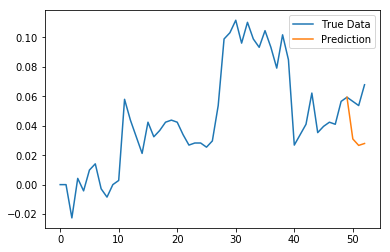

In [36]:
x_train, y_train, x_test, y_test = lstm.SplitDatatoTest(NormalizeData, ColumnList, NumOfPredictDay)
#預測
predictions = lstm.predict_point_by_point(model, x_test)
lstm.plot_predict(predictions, NumOfPredictDay, x_test, y_test)

In [27]:
import pandas as pd
import time

def search(Filename,WindowSize,NumOfPredictDay):
    #
    start_time = time.time()
    PredictInformation = pd.read_pickle('../predict/PredictInformation.pickle')
    for i in range(len(PredictInformation)):
        if PredictInformation['FileName'][i] == Filename:
            if PredictInformation['WindowSize'][i] == WindowSize:
                if PredictInformation['NumOfPredictDay'][i] == NumOfPredictDay:
                    #
                    print('Search duration (s) : ',time.time() - start_time)
                    
                    return PredictInformation['PredictCSVName'][i]

Filename = "3008.csv"
#Column = []
#WindowSize = [50,100]
WindowSize = 100
#NumOfPredictDay = [3,7,10,30]
NumOfPredictDay = 30
#Layer = []
#Loss = []
#Optimizer = []
#BatchSize = []
EpochList = 10
#ValidationSplit = []

CSVName = search(Filename,WindowSize,NumOfPredictDay)
forloop_start_time = time.time()
#model = keras.models.load_model("../model/" + ModelName)
print('Load duration (s) : ',time.time() - forloop_start_time)

Search duration (s) :  0.001504659652709961
Load duration (s) :  0.0


In [28]:
StoreData = pd.read_pickle('../predict/' + CSVName[:-4] + '.pickle')
x_predict = np.array(StoreData.iloc[:WindowSize])
y_predict = np.array(StoreData.iloc[WindowSize:])

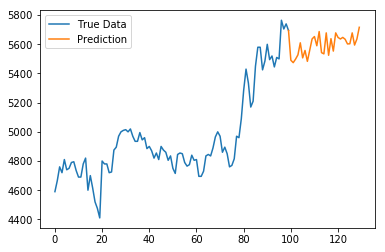

In [29]:
import matplotlib.pyplot as plt
#plt true_data
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(list(x_predict), label='True Data')
#plt predicted_data
padding = [None for p in range(len(x_predict)-1)]
plt.plot(padding + list(x_predict[-1]) + list(y_predict), label='Prediction')
plt.legend()
plt.show()
plt.clf()